In [5]:
#Standard
import time
import numpy as np
import pandas as pd

# file manipulation
import os
import json
from ast import literal_eval

# word embedings
import gensim
from gensim import corpora, models, similarities

# Word Counter
from collections import Counter

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [6]:
## Load tweets to pandas
DataPath = 'C:\\Users\\Vojta-Acer\\Desktop\\Diplomka\\dataProcessed\\tweetsAAPL.csv'
tweetsClean = pd.read_csv(DataPath)
# convert column values to lists of words
tweetsClean['lemmas'] = tweetsClean['lemmas'].apply(literal_eval)
tweetsClean['tokens'] = tweetsClean['tokens'].apply(literal_eval)

## Load word Embedings
# Load Glove (twitter trained)
DataPath = 'C:\\Users\\Vojta-Acer\\Desktop\\Diplomka\\word2vec\\glove.twitter.27B.200d.txt'
GLOVEmodel = gensim.models.KeyedVectors.load_word2vec_format(DataPath)

# Load W2V (Google News trained)
DataPath = 'C:\\Users\\Vojta-Acer\\Desktop\\Diplomka\\word2vec\\GoogleNews-vectors-negative300.bin'
W2Vmodel = gensim.models.KeyedVectors.load_word2vec_format(DataPath, binary=True)

In [7]:
# Get most common word list
words = Counter()
for idx in tweetsClean.index:
    words.update(tweetsClean['lemmas'].loc[idx, ])

In [8]:
# Selected Wordlist
wordlist = ['tablet', 'phone' , 'mobile', 'smartphone',
            'mac', 'ipod', 'ipad', 'iphones',
            'trade', 'trading', 'trader', 'quant', 'daytrading', 'algos', 'stock', 'exchange',
            'samsung', 'apple', 'microsoft', 'google', 'ibm', 'twitter', 'facebook', 'tweet',
            'nyse', 'nasdaq','amex', 
            'price', 'open', 'close', 'buy', 'sell']

group = ['A', 'A', 'A', 'A', 
        'B', 'B', 'B', 'B',
        'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
        'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
        'E', 'E', 'E',
        'G', 'G', 'G', 'G', 'G']

colorDict = {'A':'red', 'B':'blue', 'C':'green', 'D':'black', 'E':'purple', 'G':'yellow'}

In [9]:
import matplotlib.lines as mlines

<h1>Google news trained Word2Vec <h1/>

In [10]:
def W2Wvectorize(token):
    wordVec = []
    try:
        wordVec = W2Vmodel[token]
    except:
        pass
    return wordVec


dfNew = pd.Series(wordlist)
W2Wvectors = dfNew.apply(W2Wvectorize).apply(pd.Series)
W2Wvectors = W2Wvectors.set_index(dfNew).dropna()

<h2> PCA Plot using Twitter trained Word2Vec<h2/>

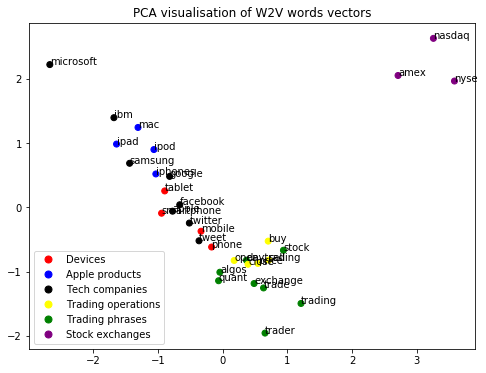

In [11]:
# PCA - get first two principal components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(W2Wvectors.values)
x = pca_result[:,0]
y = pca_result[:,1] 

## Annotated plot
wordColors = pd.Series(group)
n = W2Wvectors.index.values
fig, ax = plt.subplots()
ax.scatter(x, y, c = wordColors.apply(lambda x: colorDict[x]))

# annotate each dot with word
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))

# legend
colors = ['red', 'blue', 'black', 'yellow', 'green', 'purple']
texts = ['Devices', 'Apple products', 'Tech companies', 'Trading operations', 'Trading phrases', 'Stock exchanges']
patches = [ plt.plot([],[], marker="o",ms=7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches)
plt.title("PCA visualisation of W2V words vectors")    
fig.set_size_inches(8, 6)
plt.show()

<h2> TSNE Plot using Twitter trained Word2Vec<h2/>

[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.001s...
[t-SNE] Computed neighbors for 32 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 1.140971
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.982784
[t-SNE] Error after 1850 iterations: 0.189683


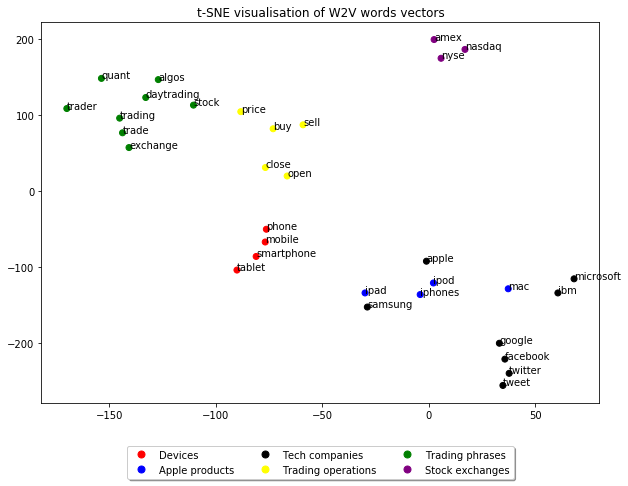

In [12]:
tsne = TSNE(n_components=2, verbose=1, perplexity=4, n_iter=2000, random_state=7)
tsne_results = tsne.fit_transform(W2Wvectors.values)

x = tsne_results[:,0]
y = tsne_results[:,1] 

## Annotated plot
wordColors = pd.Series(group)
n = W2Wvectors.index.values
fig, ax = plt.subplots()
ax.scatter(x, y, c = wordColors.apply(lambda x: colorDict[x]))

# annotate each dot with word
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))

# legend
colors = ['red', 'blue', 'black', 'yellow', 'green', 'purple']
texts = ['Devices', 'Apple products', 'Tech companies', 'Trading operations', 'Trading phrases', 'Stock exchanges']
patches = [ plt.plot([],[], marker="o",ms=7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3) 
    
fig.set_size_inches(10, 7)
plt.title("t-SNE visualisation of W2V words vectors")
fig.savefig('visualisation_W2V_embedding.png', bbox_inches="tight")

<h1>Twitter trained GLOVE<h1/>

In [13]:
def GLOVEvectorize(token):
    wordVec = []
    try:
        wordVec = GLOVEmodel[token]
    except:
        pass
    return wordVec

dfNew = pd.Series(wordlist)
GLOVEVectors = dfNew.apply(GLOVEvectorize).apply(pd.Series)
GLOVEVectors = GLOVEVectors.set_index(dfNew).dropna()

<h2> PCA Plot using Twitter trained GLOVE<h2/>

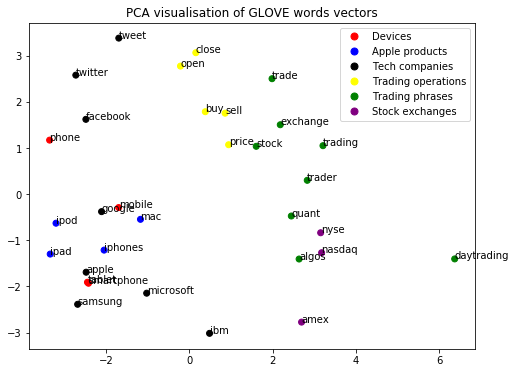

In [14]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(GLOVEVectors.values)

# get first two principal components
x = pca_result[:,0]
y = pca_result[:,1] 

## Annotated plot
wordColors = pd.Series(group)
n = GLOVEVectors.index.values

fig, ax = plt.subplots()
ax.scatter(x, y, c=wordColors.apply(lambda x: colorDict[x]))

# annotate each dot with word
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))

# legend
colors = ['red', 'blue', 'black', 'yellow', 'green', 'purple']
texts = ['Devices', 'Apple products', 'Tech companies', 'Trading operations', 'Trading phrases', 'Stock exchanges']
patches = [ plt.plot([],[], marker="o",ms=7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches)    
    
fig.set_size_inches(8, 6)
plt.title("PCA visualisation of GLOVE words vectors")
plt.show()

<h2> TSNE Plot using Twitter trained GLOVE<h2/>

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.001s...
[t-SNE] Computed neighbors for 32 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 1.953856
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.536346
[t-SNE] Error after 2600 iterations: 0.239412


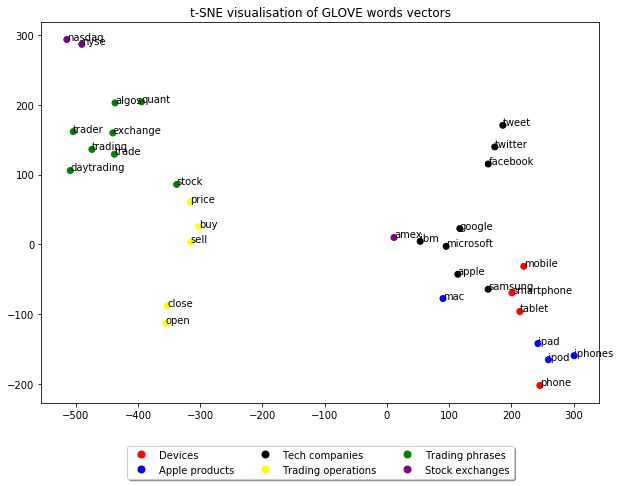

In [15]:
tsne = TSNE(n_components=2, verbose=1, perplexity=3, n_iter=5000, random_state=28)
tsne_results = tsne.fit_transform(GLOVEVectors.values)
x = tsne_results[:,0]
y = tsne_results[:,1] 

## Annotated plot
wordColors = pd.Series(group)
n = GLOVEVectors.index.values
fig, ax = plt.subplots()
ax.scatter(x, y, c=wordColors.apply(lambda x: colorDict[x]))

# annotate each dot with word
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))

# legend
colors = ['red', 'blue', 'black', 'yellow', 'green', 'purple']
texts = ['Devices', 'Apple products', 'Tech companies', 'Trading operations', 'Trading phrases', 'Stock exchanges']
patches = [ plt.plot([],[], marker="o",ms=7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3) 
    
fig.set_size_inches(10, 7)
plt.title("t-SNE visualisation of GLOVE words vectors")
fig.savefig('visualisation_GLOVE_embedding.png', bbox_inches="tight")

# PCA combined

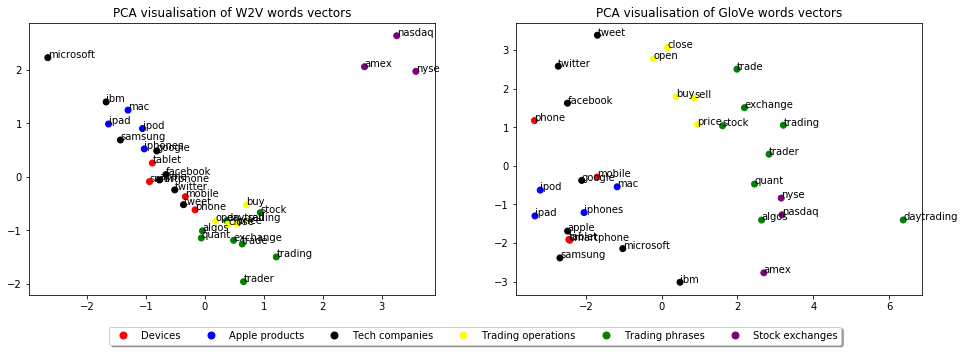

In [16]:
# FIGURE
fig, ax = plt.subplots(1,2, figsize = (16, 5))

# PLOT 1
pca = PCA(n_components=3)
pca_result = pca.fit_transform(W2Wvectors.values)
x = pca_result[:,0]
y = pca_result[:,1] 
wordColors = pd.Series(group)
n = W2Wvectors.index.values
ax[0].scatter(x, y, c = wordColors.apply(lambda x: colorDict[x]))
for i, txt in enumerate(n):
    ax[0].annotate(txt, (x[i],y[i]))
colors = ['red', 'blue', 'black', 'yellow', 'green', 'purple']
texts = ['Devices', 'Apple products', 'Tech companies', 'Trading operations', 'Trading phrases', 'Stock exchanges']
patches = [ plt.plot([],[],  marker="o",ms=7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
ax[0].legend(handles=patches, loc='upper center', bbox_to_anchor=(1.1, -0.1), fancybox=True, shadow=True, ncol=6)
ax[0].set_title("PCA visualisation of W2V words vectors")

# PLOT  2
pca = PCA(n_components=3)
pca_result = pca.fit_transform(GLOVEVectors.values)
x = pca_result[:,0]
y = pca_result[:,1] 
wordColors = pd.Series(group)
n = GLOVEVectors.index.values
ax[1].scatter(x, y, c=wordColors.apply(lambda x: colorDict[x]))
for i, txt in enumerate(n):
    ax[1].annotate(txt, (x[i],y[i]))
colors = ['red', 'blue', 'black', 'yellow', 'green', 'purple']
texts = ['Devices', 'Apple products', 'Tech companies', 'Trading operations', 'Trading phrases', 'Stock exchanges']
patches = [ plt.plot([],[], marker="o",ms=7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ] 
ax[1].set_title("PCA visualisation of GloVe words vectors")
fig.savefig('visualisation_PCA_embedding.png', bbox_inches="tight")

# t-SNE Combined

[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.001s...
[t-SNE] Computed neighbors for 32 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 1.140971
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.982784
[t-SNE] Error after 1850 iterations: 0.189683
[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.001s...
[t-SNE] Computed neighbors for 32 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 1.953856
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.536346
[t-SNE] Error after 2600 iterations: 0.239412


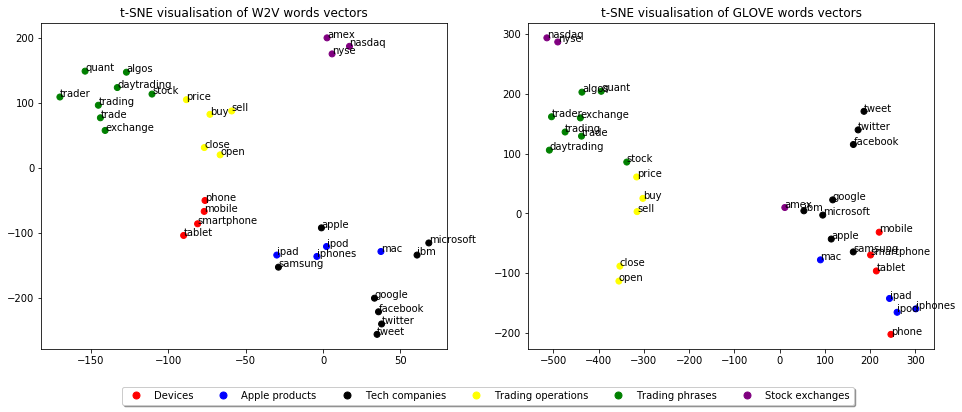

In [17]:
# FIGURE
fig, ax = plt.subplots(1,2, figsize = (16, 6))

# PLOT 1
tsne = TSNE(n_components=2, verbose=1, perplexity=4, n_iter=2000, random_state=7)
tsne_results = tsne.fit_transform(W2Wvectors.values)
x = tsne_results[:,0]
y = tsne_results[:,1] 
wordColors = pd.Series(group)
n = W2Wvectors.index.values
ax[0].scatter(x, y, c = wordColors.apply(lambda x: colorDict[x]))
for i, txt in enumerate(n):
    ax[0].annotate(txt, (x[i],y[i]))
colors = ['red', 'blue', 'black', 'yellow', 'green', 'purple']
texts = ['Devices', 'Apple products', 'Tech companies', 'Trading operations', 'Trading phrases', 'Stock exchanges']
patches = [ plt.plot([],[], marker="o",ms=7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
ax[0].legend(handles=patches, loc='upper center', bbox_to_anchor=(1.1, -0.1), fancybox=True, shadow=True, ncol=6)
ax[0].set_title("t-SNE visualisation of W2V words vectors")    

# PLOT 2
tsne = TSNE(n_components=2, verbose=1, perplexity=3, n_iter=5000, random_state=28)
tsne_results = tsne.fit_transform(GLOVEVectors.values)
x = tsne_results[:,0]
y = tsne_results[:,1] 
wordColors = pd.Series(group)
n = GLOVEVectors.index.values
ax[1].scatter(x, y, c=wordColors.apply(lambda x: colorDict[x]))
for i, txt in enumerate(n):
    ax[1].annotate(txt, (x[i],y[i]))
colors = ['red', 'blue', 'black', 'yellow', 'green', 'purple']
texts = ['Devices', 'Apple products', 'Tech companies', 'Trading operations', 'Trading phrases', 'Stock exchanges']
patches = [ plt.plot([],[], marker="o",ms=7, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
ax[1].set_title("t-SNE visualisation of GLOVE words vectors")
fig.savefig('visualisation_tSNE_embedding.png', bbox_inches="tight")